In [68]:
from tqdm import tqdm
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torchvision.transforms as transforms

import medmnist
from medmnist import INFO, Evaluator

In [142]:
class ToTensor:
    def __call__(self, x):
        return torch.from_numpy(x).float()

In [143]:
data_flag = 'organmnist3d'
download = True

NUM_EPOCHS = 3
BATCH_SIZE = 128
lr = 0.001
size = 28 # Options: 28, 64

info = INFO[data_flag]
n_channels = info['n_channels']
n_classes = len(info['label'])
task = info['task']

DataClass = getattr(medmnist, info['python_class'])

# load the data
train_dataset = DataClass(split='train', transform=transforms.Compose([ToTensor()]), download=download, size=64)
#train_dataset = DataClass(split='train', download=download, size=64)

# encapsulate data into dataloader form
train_loader = data.DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)

In [144]:
x, y = train_dataset[0]

print(x.shape, y.shape)

torch.Size([1, 64, 64, 64]) (1,)


In [145]:
x.dtype

torch.float32

In [129]:
for x, y in train_loader:
    print(x.shape, y.shape)
    break

torch.Size([128, 1, 64, 64, 64]) torch.Size([128, 1])


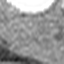

In [130]:
frames = train_dataset.montage(length=1, save_folder="/home/arthur/")
frames[10]


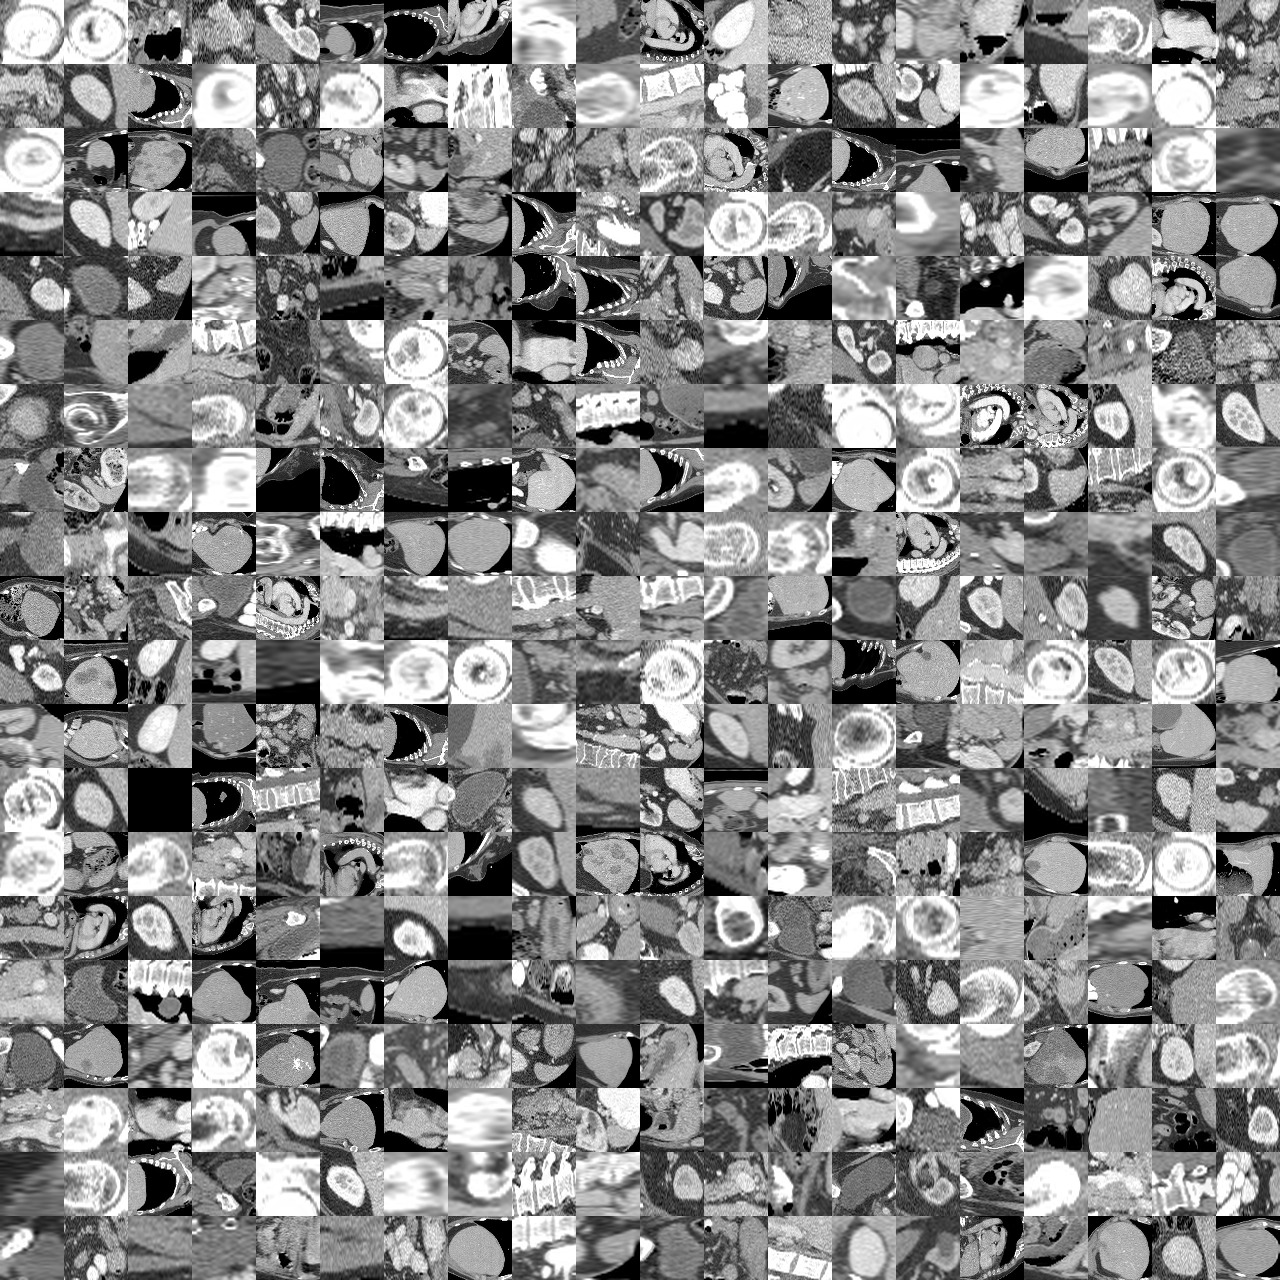

In [80]:
frames = train_dataset.montage(length=20, save_folder="/home/arthur/")

frames[10]

In [195]:
import torch.nn as nn
from torch.nn.functional import relu

In [202]:
class UNET3D(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv3d(1, 32, 2)
        self.max1 = nn.MaxPool3d(2)
        self.conv2 = nn.Conv3d(32, 64, 2)
        self.max2 = nn.MaxPool3d(2)
        self.conv3 = nn.Conv3d(64, 128, 2)
        self.max3 = nn.MaxPool3d(2)
        self.conv4 = nn.Conv3d(128, 256, 2)
        self.max4 = nn.MaxPool3d(2)
        self.conv5 = nn.Conv3d(256, 512, 2)
    
    def forward(self, x):
        x = self.max1(relu(self.conv1(x)))
        x = self.max2(relu(self.conv2(x)))
        x = self.max3(relu(self.conv3(x)))
        x = self.max4(relu(self.conv4(x)))
        x = nn.functional.relu(self.conv5(x))
        return x.view(x.shape[0], -1)
    
model = UNET3D()

In [203]:
torch.max(model(x))

tensor(0.0670, grad_fn=<MaxBackward1>)